In [1]:
import pandas as pd

In [9]:
df = pd.read_csv(r"C:\Users\BIT\Downloads\train.csv")

In [10]:
df.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [11]:
df.shape

(42000, 785)

In [25]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
18147      2       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
18147       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
18147         0         0         0         0         0  

[1 rows x 785 columns]

In [21]:
import matplotlib.pyplot as plt

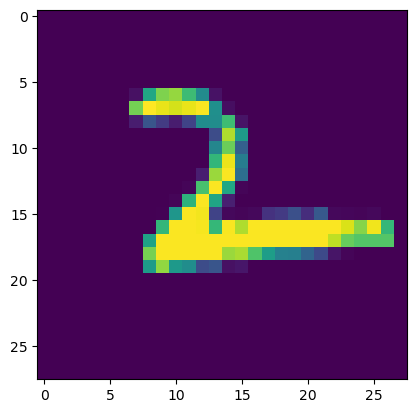

In [29]:
plt.imshow(df.iloc[18147,1:].values.reshape(28,28))

In [31]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train.shape

(33600, 784)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

16.558762311935425


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [53]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [55]:
X_train_trf.shape

(33600, 200)

In [57]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [61]:
y_pred = knn.predict(X_test_trf)

In [63]:
accuracy_score(y_test,y_pred)

0.9502380952380952

In [87]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [89]:
X_train_trf

array([[-2.71865335, -0.49053833],
       [-0.6768891 , -6.75354587],
       [-3.03315731,  6.51056334],
       ...,
       [ 2.14895205,  0.78184213],
       [ 1.05945954,  0.94700904],
       [17.70246321,  1.961613  ]])

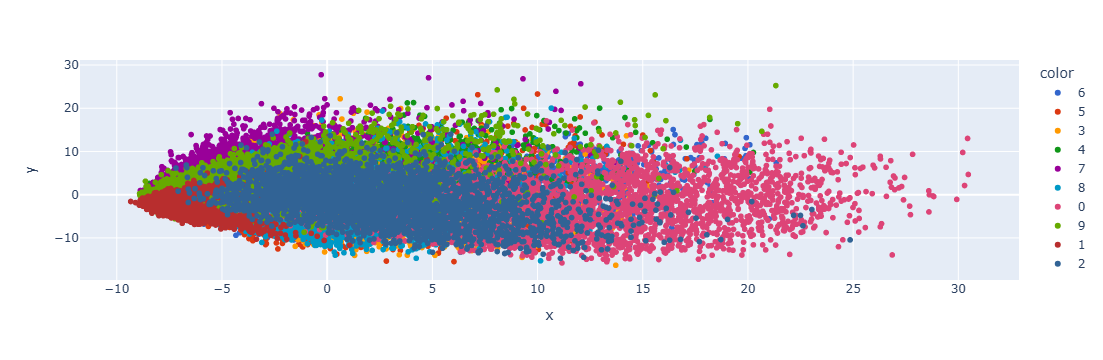

In [91]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [93]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [94]:
X_train_trf

array([[-2.71862849, -0.48992978,  1.1356855 ],
       [-0.67702784, -6.75282858, -2.33584036],
       [-3.03318424,  6.50952468,  7.49191747],
       ...,
       [ 2.14882137,  0.78057742, -0.74741035],
       [ 1.05957951,  0.94765348,  3.94987018],
       [17.70258318,  1.96266765, -4.94350252]])

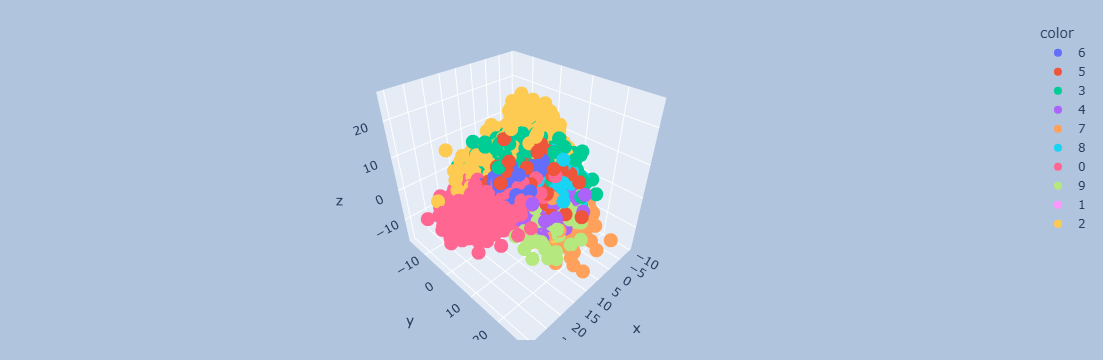

In [97]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [99]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023375, 26.74459619])

In [100]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [101]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [105]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [107]:
pca.explained_variance_.shape

(784,)

In [109]:
pca.components_.shape

(784, 784)

In [78]:
np.cumsum(pca.explained_variance_ratio_)

NameError: name 'np' is not defined

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))